In [26]:
# Import the dependencies
import numpy as np
from scipy.linalg import toeplitz, cholesky, sqrtm, inv
# import scipy.linalg as la
from scipy import signal
from scipy.integrate import odeint
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
print("Imports done")


Imports done


Text(0.5, 1.0, 'Sigma_z')

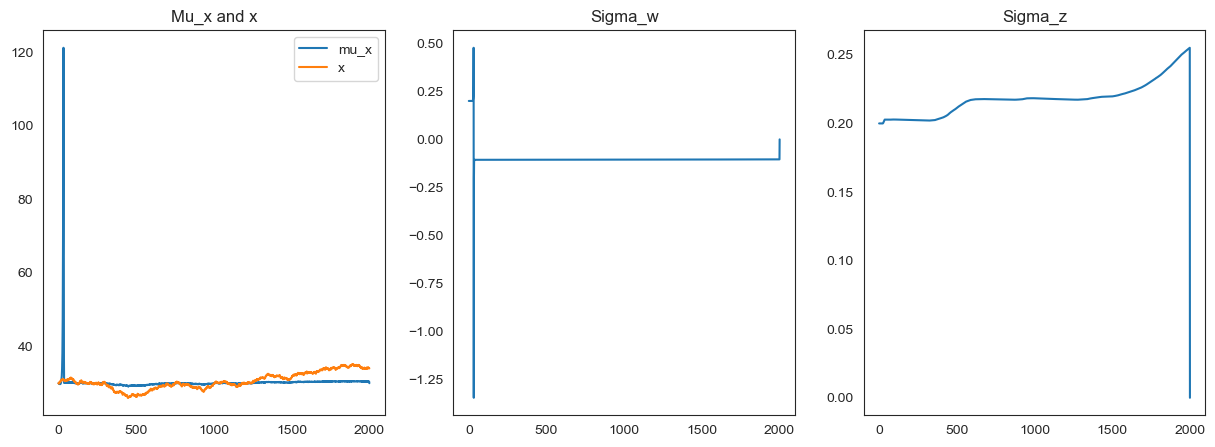

In [27]:
from statistics import mean, variance, pstdev
# Setting up the time data:
dt = 0.005; # integration step, average neuron resets 200 times per second
T = 10 + dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points



def g_gp(x):

    t0=25
    return t0 -16 / (1 + np.exp(5-x/5))

def dg_gp(x):
    
    return -16/5* np.exp(5-x/5) / (np.exp(5-x/5)+1)**2





#initate arrays
mu_x = np.zeros(N)
e_x = np.zeros(N)
e_y = np.zeros(N)
e_omega = np.zeros(N)
y =np.zeros(N)



omega_x = np.zeros(N)
omega_y = np.zeros(N)
sigma_x = np.zeros(N)
sigma_y = np.zeros(N)
mu_x = np.ones(N)*30
x = np.zeros(N)
std = np.zeros(N)


omega_x[0] = 5
omega_y[0] = 5
mu_v = 30
x[0] = 30


std_noise_x = 0.1
std_noise_y = 0.1

alpha_x = 0.1
alpha_y = 0.1
alpha_mux =20
dmuxvec= [0]




for i in range(0,N-1):
    x[i+1] = x[i]       + np.random.randn(1)*std_noise_x

for i in range(N-1):
    y[i] = g_gp(x[i])   + np.random.randn(1)*std_noise_y 



for i in np.arange(1,N-1):    
    

    sigma_x[i-1] =  1/omega_x[i-1]
    sigma_y[i-1] =  1/omega_y[i-1]
    
    
    e_x[i] = mu_x[i] - mu_x[i-1] 
    e_y[i] = y[i-1] - g_gp(mu_x[i-1])   

    domega_x = alpha_x*(1/omega_x[i-1] - e_x[i]**2)
    domega_y = alpha_y*(1/omega_y[i-1] - e_y[i]**2)
    
    
    omega_x[i] = omega_x[i-1] + dt*domega_x
    omega_y[i] = omega_y[i-1] + dt*domega_y

    dFdmu_x = e_x[i]*omega_x[i-1] - dg_gp(mu_x[i-1]) * e_y[i]*omega_y[i-1]
    
    

    dmu_x   = 0 - alpha_mux* dFdmu_x
    
    mu_x[i] = mu_x[i-1] + dt*dmu_x

    dmuxvec.append(dmu_x)
    sigma_x[i] =1/ omega_x[i]
    sigma_y[i] =1/ omega_y[i]



plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(mu_x, label =  "mu_x")
plt.plot(x, label = "x" )
plt.legend()
plt.title(label ="Mu_x and x")

plt.subplot(1,3,2)
plt.plot(sigma_x, label =  "sigma_w")
plt.title(label ="Sigma_w")


plt.subplot(1,3,3)
plt.plot(sigma_y, label = "sigma_z")
plt.title(label ="Sigma_z")


[ 0.          0.          0.02279592 ... -0.43069483 -0.45903652
  0.        ]


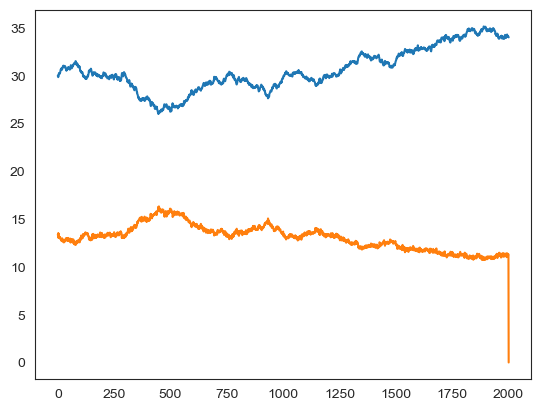

In [28]:
print(e_x)


plt.figure()
plt.plot(x)
plt.plot(y)

In [29]:

print(np.mean(sigma_x[-1]), "mean sigma_w")
print(np.mean(sigma_y[-1]), "mean sigma_z")

print(mu_x)
print(x)

0.0 mean sigma_w
0.0 mean sigma_z
[30.         29.97720408 29.94907461 ... 30.45903652 30.40955045
 30.        ]
[30.         30.05217989 29.87257524 ... 34.13685359 34.07605536
 34.03620589]


In [30]:
# from statistics import mean, variance, pstdev
# # Setting up the time data:
# dt = 0.005; # integration step, average neuron resets 200 times per second
# T = 900+dt; # maximum time considered
# t = np.arange(0,T,dt)
# N= t.size #Amount of data points



# def g_gp(x):

#     t0=25
#     return t0 -16 / (1 + np.exp(5-x/5))

# def dg_gp(x):
    
#     return -16/5* np.exp(5-x/5) / (np.exp(5-x/5)+1)**2





# #initate arrays
# mu_x = np.zeros(N)
# e_x = np.zeros(N)
# e_y = np.zeros(N)
# y =np.zeros(N)

# omega_x = np.zeros(N)
# omega_y = np.zeros(N)
# sigma_x = np.zeros(N)
# sigma_y = np.zeros(N)
# EWMA_x = np.zeros(N)
# EWMA_y = np.zeros(N)

# std = np.zeros(N)


# omega_x[0] = 1
# omega_y[0] = 5
# mu_v = 25
# mu_x[0]= mu_v
# x = 30
# std_noise = 0.3


# y[0] = g_gp(x)




# for i in np.arange(0,N-1):
#    # x = x + np.random.randn(1)*std_noise
    
#     sigma_x[i] = 1/omega_x[i]
#     sigma_y[i] =  1/omega_y[i]
    
    
#     e_x[i] = mu_x[i] - mu_v
#     e_y[i] = y[0] - g_gp(mu_x[i])+ np.random.randn(1)*std_noise
   

#     domega_x = 0.5*(sigma_x[i]- e_x[i]**2)
#     domega_y = 0.5*(sigma_y[i]- e_y[i]**2)
    
#     # # WMA
#     # if i >50:
#     #     omega_x[i+1] = omega_x[i] + dt*domega_x
#     #     omega_y[i+1] = np.mean(omega_y[i-50:i]) + dt*domega_y
#     # else:
#     #     omega_x[i+1] = omega_x[i] + dt*domega_x
#     #     omega_y[i+1] = omega_y[i] + dt*domega_y
    
#     #EWMA
#     # omega_x[i+1] = omega_x[i] + dt*domega_x
#     # omega_y[i] = 0.2*omega_y[i] + (1-0.2)*omega_y[i-1] 
#     # omega_y[i+1] = omega_y[i] + dt*domega_y

#     dFdmu_x = e_x[i]*omega_x[i] - dg_gp(mu_x[i]) * e_y[i]*omega_y[i]
#     dmu_x   = 0 - dFdmu_x
#     mu_x[i+1] = mu_x[i] + dt*dmu_x


#     sigma_x[i+1] =1/ omega_x[i+1]
#     sigma_y[i+1] =1/ omega_y[i+1]